# 문제 정의
- 버섯 데이터의 특성들을 활용하여 해당 버섯이 독인지 식용인지 분류해보자.
- 결정트리 모델을 시각화해보자
- 특성 선택(Feature selection)을 진행해보자

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# train_test_split: 데이터 랜덤 분리 서비스
from sklearn.model_selection import train_test_split
# DecisionTreeClassifier : 결정트리 분류 모델 클래스
from sklearn.tree import DecisionTreeClassifier

# 2. 데이터 수집
- csv파일 로드
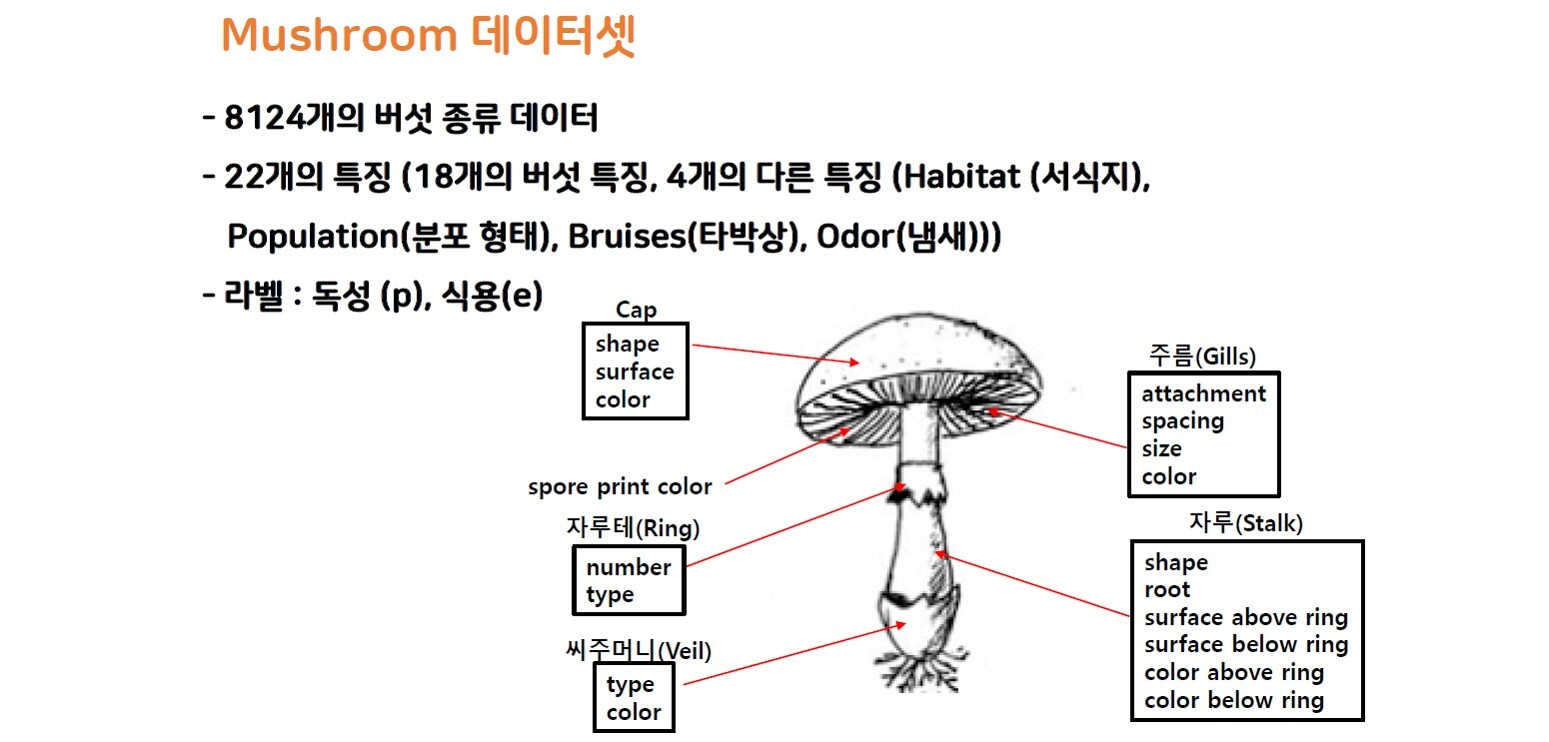

In [34]:
# 1. 데이터 로드(index 설정 없이)
# 2. 전체 컬럼, 행의 숫자 파악
# 3. 데이터 타입 확인
# 4. 결측치가 있는지 확인
data = pd.read_csv('../data/mushroom.csv')
data.info()
print(data)
# poisonous : 정답 컬럼(p 는 독버섯, e는 식용 버섯)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [35]:
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [36]:
data.shape

(8124, 23)

# 3. 데이터 전처리
- 학습용 데이터이므로 생략

# 4. 탐색적 데이터 분석
- 기술통계
- 시각화

In [37]:
# 기술 통계치 확인
data.describe()
# 문자형 데이터는 수치형 데이터처럼 평균이나 표준편차 등이 아닌 다른 통계치가 나옴
    # top : 해당 컬럼에서 가장 만은 수를 차지하는 데이터(최빈값)
    # freq : top의 빈도수(개수)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


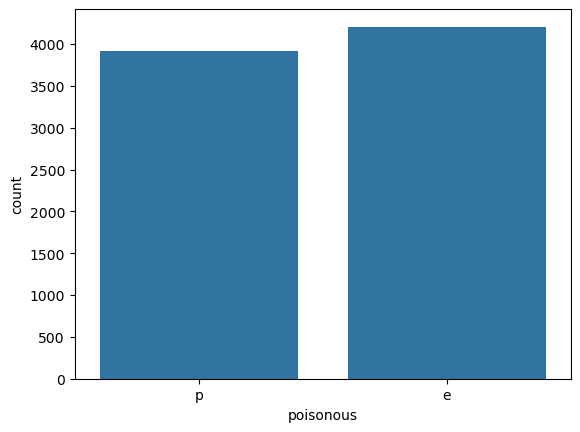

In [38]:
# 정답 컬럼 확인하기 
# countplot : bar 형태로 데이터의 수를 출력
sns.countplot(data=data,
             x='poisonous');
# 정답 컬럼인 poisonou의 p(독성), e(식용)의 비율이 한쪽으로 편향되어 있지 않은 것을 확인!

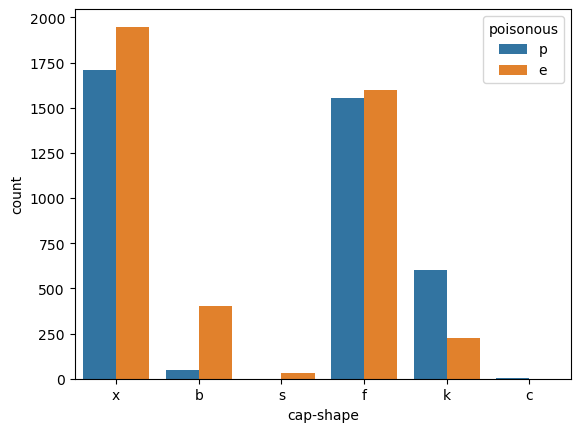

In [39]:
# cap-shape : 버섯 모양(갓)에 따른 독성, 식용 데이터 분호
sns.countplot(data=data,
             x='cap-shape',
              # hue : 해당 컬럼의 unique 값들이 들어가서 카운팅되고 범례도 출력됨 
              hue = 'poisonous'
             );

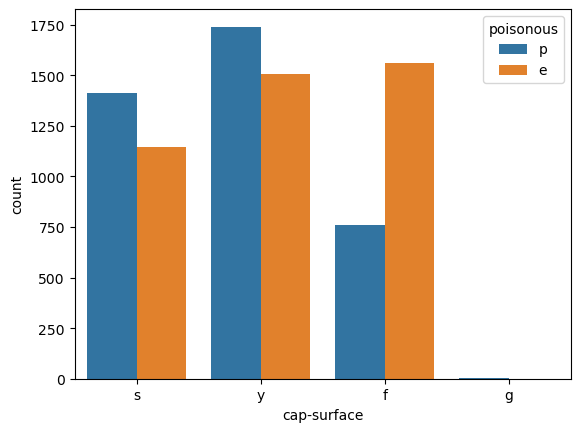

In [40]:
# cap-surface : 버섯 표면 성질에 따른 독성, 식용 데이터 분포
sns.countplot(data=data,
             x='cap-surface',
              hue = 'poisonous'
             );

# 5. 모델링
- 모델 선택, 모델 튜닝 및 학습, 모델 평가

In [73]:
# 데이터를 문제(X), 정답(y)으로 분리
    # X= data.iloc[:,1:23]
    # y= data.iloc[:,0]
# loc를 사용할 경우
X = data.loc[:, 'cap-shape':]
y = data.loc[:,'poisonous']

In [74]:
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


#### 문자형 데이터 인코딩
- 레이블 인코딩(Label Encoding)
  - 특정 문자 데이터를 0,1,2 ... 순으로 정수 간격으로 매핑하는 방식
  - 간단하고 직관적이나 숫자의 크고 작음에 대한 특성이 작용하므로 거리나 수치 기반 모델에 적용했을 때 정확한 예측을 하기 힘들 수 있음
- 원 핫 인코딩(one-hot Encoding)
  - 특정 칼럼의 유니트 값에 대한 더미 컬럼들을 만들어 실제 데이터가 있는 자리에 1로 표시하고 나머지는 0으로 채워주는 방식
  - 컴퓨터는 모든 데이터를 2진수로 처리하기 때문에 기계가 직관적으로 받아들이기 쉬운 형태이며, 수치의 크고 작음에 대한 특성이 없음
  - 데이터의 종류가 많을 경우 그 만큼 더미 컬럼들이 많이 만들어져야 하기 때문에 메모리 소모가 클 수 있음

#### 레이블 인코딩
- 범주형(문자형) 특성인 데이터를 레이블 인코딩하기

In [75]:
X['cap-shape'].value_counts()

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

In [76]:
# 인코딩 전 
X['cap-shape']

0       x
1       x
2       b
3       x
4       x
       ..
8119    k
8120    x
8121    f
8122    k
8123    x
Name: cap-shape, Length: 8124, dtype: object

In [77]:
# 인코딩 후 
# 방법 1: map 함수 사용(key값의 데이터를 value 값으로 변환)
X['cap-shape'].map({'x':0, 'f':1, 'k':2, 'b':3, 's':4, 'c':5})

0       0
1       0
2       3
3       0
4       0
       ..
8119    2
8120    0
8121    1
8122    2
8123    0
Name: cap-shape, Length: 8124, dtype: int64

In [78]:
# 방법 2: 레이블 인코딩을 자동으로 진행해주는 레이블 인코더 임포트
from sklearn.preprocessing import LabelEncoder

In [79]:
le = LabelEncoder() # 레이블 인코더 객체 생성
le.fit(X['cap-shape']) # 레이블 인코더로 학습(우리의 데이터 범위를 인지시켜주기)
labels = le.transform(X['cap-shape']) # 학습된 인코더로 실제 정수값으로 변환
labels

array([5, 5, 0, ..., 2, 3, 5], shape=(8124,))

In [80]:
# 인코더로 변환한 값의 순서 확인(인덱스 번호로 변환됨)
    # 영문은 a,b,c 순서, 한글은 가,나,다 순서
le.classes_


array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object)

#### 여러 개의 컬럼 동시에 레이블 인코딩 시키기



In [81]:
encoded_X = X.copy() # 기존 데이터 복사해서 활용
# 데이터를 가공하는데 있어서 실수할 수도 있기 때문에 새로운 변수에 담아서 활용한다.
# 원본데이터를 건들지 않을 수 있음 

le = LabelEncoder()

for col in encoded_X.columns :
    # fit_transform : fit과 transform 의 기능을 하나로 합친 함수
    encoded_X[col] = le.fit_transform(encoded_X[col])

encoded_X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


#### 원핫 인코딩(one-hot Encoding
- 범주형(문자형) 특성인 데이터를 원핫 인코딩하기

In [82]:
# dtype을 int로 설정하면 0,1로 출력됨(디폴트는 True, False로 출력됨)
# 특정 칼럼만 원핫 인코딩하기
temp = pd.get_dummies(X['cap-shape'], dtype=int)
temp

,b,c,f,k,s,x
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
8119,0,0,0,1,0,0
8120,0,0,0,0,0,1
8121,0,0,1,0,0,0
8122,0,0,0,1,0,0


In [83]:
# 데이터프레임 전체를 원핫 인코딩하기
X_one_hot = pd.get_dummies(X, dtype=int)
X_one_hot

# 데이터프레임에 문자형 데이터와 수치형 데이터가 섞여 있으면 자동으로 문자형 데이터만 변환된다 

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [84]:
# 학습 및 평가 데이터로 나누기 (train_test_split 사용)
X_train, X_test, y_train, y_test = train_test_split(
    X_one_hot, y, # 문제, 정답 데이터
    test_size = 0.3, # 평가 데이터 비율(0.3이면 전체중에 30%를 의미함)
    random_state=99, # 데이터를 섞을 때 랜덤 시드값 설정
    stratify = y # 정답 클래스의 비율을 train과 test에 동일하게 맞춤(데이터 편향 줄이기)
)

X_one_hot 은 X_train, X_test로 분리되고,
y는 y_train, y_test로 분리된다. 

stratify : p,e의 비율을 train 데이터에도 동일한 비율로 적용하겠다! 
    

In [85]:
# 실행해보기
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5686, 117)
(5686,)
(2438, 117)
(2438,)


In [86]:
# 결정 트리 모델 객체 생성
# 하이퍼파라미터 입력 
tree_model = DecisionTreeClassifier(
    max_depth =3,
    max_leaf_nodes = 5, # 최대 리프 노트 개수
    min_samples_leaf = 50 # 리프 노드의 최소 데이터 개수
)
tree_model

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,5
,min_impurity_decrease,0.0
,class_weight,None


In [87]:
# 모델 학습
# 학습은 train 데이터!!
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,5
,min_impurity_decrease,0.0
,class_weight,None


In [88]:
# 학습 데이터의 정확도 출력하기 -> score 매소드 사용!
tree_model.score(X_train, y_train)

0.9693985226873022

In [89]:
# 평가 데이터 정확도 출력하기
tree_model.score(X_test, y_test)

0.9680065627563577

## 학습된 트리 모델의 내부 구조 시각화

In [90]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [91]:
import graphviz 
# export_graphviz : 트리를 그리기 위한 정보를 추출해주는 함수
from sklearn.tree import export_graphviz 

In [92]:
export_graphviz(
    tree_model,                       # 학습된 모델 객체
    out_file='../data/tree.dot',         # 파일명 및 저장 경로(dot:그래프 출력 정보 파일)
    class_names=['식용', '독'],        # 클래스 명칭 설정
    feature_names=X_one_hot.columns,  # 컬럼명 지정(one-hot인코딩 된 컬럼명)
    impurity=True,                    # 지니 불순도 출력(False는 미출력)
    filled=True                       # 클래스 별 색상 구분 설정
)

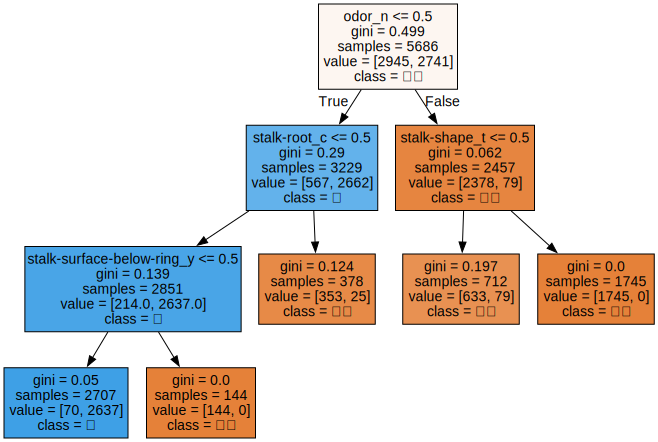

In [105]:
# dot 파일 불러오기
with open('../data/tree.dot', encoding='utf8') as f:
    dot_graph = f.read()

# 트리 시각화
display(graphviz.Source(dot_graph))



In [94]:
# 하이퍼파라미터 설정 없이 모델 객체 만들기
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [95]:
tree_model2.score(X_test,y_test)


1.0

In [96]:
tree_model2.score(X_train,y_train)


1.0

In [97]:
export_graphviz(
    tree_model2,                       # 학습된 모델 객체
    out_file='../data/tree2.dot',         # 파일명 및 저장 경로(dot:그래프 출력 정보 파일)
    class_names=['식용', '독'],        # 클래스 명칭 설정
    feature_names=X_one_hot.columns,  # 컬럼명 지정(one-hot인코딩 된 컬럼명)
    impurity=True,                    # 지니 불순도 출력(False는 미출력)
    filled=True                       # 클래스 별 색상 구분 설정
)

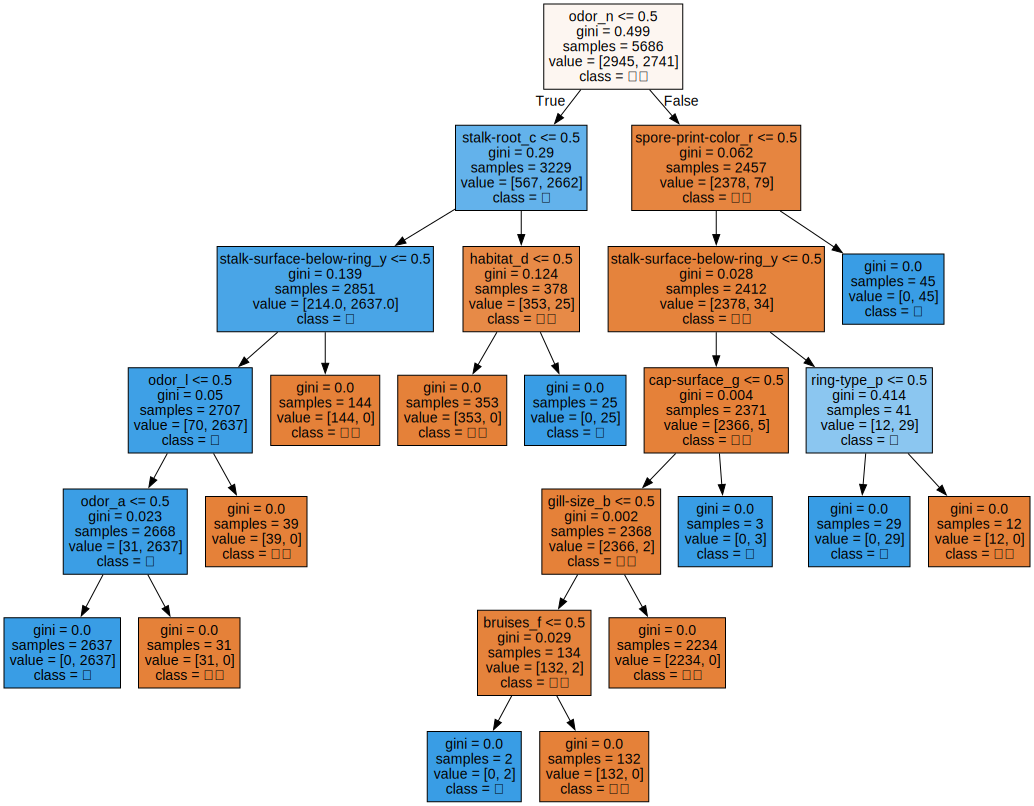

In [107]:
# dot 파일 불러오기
with open('../data/tree2.dot', encoding='utf8') as f :
    dot_graph2 = f.read()

# 트리 시각화
display(graphviz.Source(dot_graph2))

### max_depth 에 따른 train, test 데이터 정확도 비교

In [99]:
train_list, test_list = [],[] # 정확도가 담길 빈 리스트

# max_depth 를 1~10까지 비교
for k in range(1,11,1):
    # 모델 생성(max_depth는 변할 수 있도록 설정)
    tree_model3 = DecisionTreeClassifier(max_depth=k)

    # 모델 학습
    tree_model3.fit(X_train, y_train)

    # 학습한 모델의 정확도를 빈 리스트에 담기

    # train
    train_score = tree_model3.score(X_train, y_train)
    train_list.append(train_score)

    # test
    test_score = tree_model3.score(X_test, y_test)
    test_list.append(test_score)



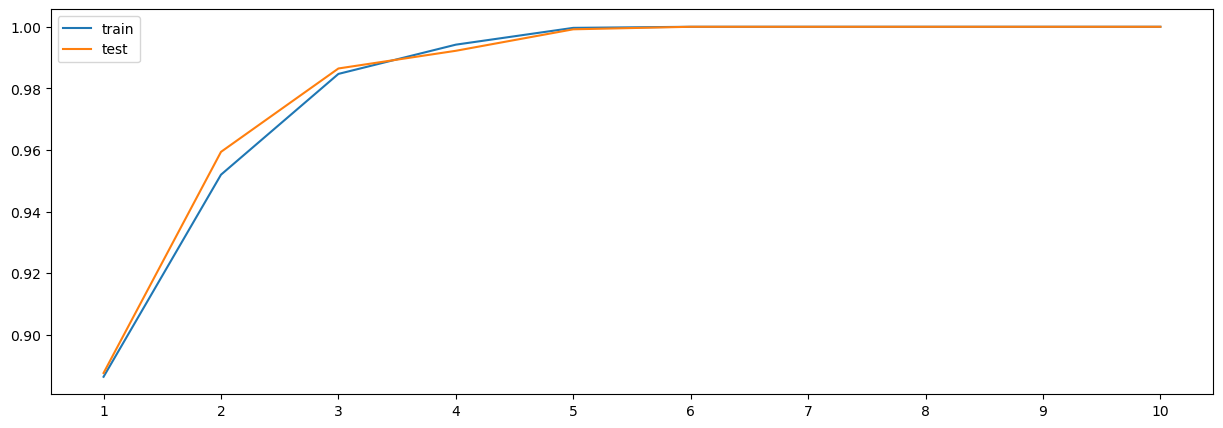

In [100]:
plt.figure(figsize=(15,5))

plt.plot(range(1,11), train_list, label='train')
plt.plot(range(1,11), test_list, label='test')

plt.xticks(range(1,11)) # max_depth는 1부터 시작하므로 틱값도 1부터 설정
plt.legend()
plt.show()

###

### 특성 선택(Feature Selection)
- 트리 모델이 정답을 예측함에 있어서 문제 데이터의 특성들의 중요도를 수치로 출력할 수 있음
(즉 해당 특성이 모델의 정답 예측에 얼마만큼 기여했는지를 수치로 알 수 있음)
    - 각 특성들은 0~1사이의 실수값을 가지며, 모든 특성의 중요도의 합은 1이 됨
- 0이 나오는 컬럼은 정답 예측에 전혀 도움이 되지 않은 특성
- 1이 나오는 컬럼은 완벽하게 정답을 예측해 내는 특성
    - 그러나 1인 특성이 있다면 모델이 정답을 예측함에 있어서 해당 특성만으로 판단했다는 뜻 (즉 다른 특성들은 정답 예측에 필요가 없게됨)

In [108]:
# 학습된 트리 모델에서 특성중요도 출력
fi = tree_model.feature_importances_
print(fi)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.696219   0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00494901 0.         0.         0.19568622
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.10314577 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [110]:
# 특성의 개수 
len(fi) 

117

In [112]:
# 특성의 순서는 칼럼 순서와 같다!
X_one_hot.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [113]:
# 데이터프레임화 시켜서 보기 편하게 출력하기
fi_df = pd.DataFrame(fi, index = X_one_hot.columns, columns=['특성중요도'])
fi_df
    

,특성중요도
cap-shape_b,0.0
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [115]:
# 내림차순으로 정렬
fi_df.sort_values(by='특성중요도',ascending=False, inplace=True)
fi_df
# 데이터 3개만으로 99% 이상의 정확도를 얻을 수 있다. 

,특성중요도
odor_n,0.696219
stalk-root_c,0.195686
stalk-surface-below-ring_y,0.103146
stalk-shape_t,0.004949
cap-surface_s,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


#### [결론]
- tree 모델 내부 시각화 표를 보면 가장 중요도가 높은 odor_n(냄새)를 먼저 고려해서 분류한 것을 확인할 수 있음
- 즉, tree 모델은 중요도가 높은 (정답을 분류하는데 중요한) 특성을 먼저 고려해서 분기시켜줘야 가장 효율적으로 분류할 수 있음
- 현재 데이터는 odor_n 컬럼이 약 69%의 중요도를 혼자 차지하고 있고, 3개의 특성만으로 99%의 중요도를 채우기 때문에 모델이 패턴을 쉽게 학습했고 100%를 수월하게 얻어낼 수 있었음 

